# Figure 2a:
## San Marcial water data (Gage 08358500)
- Daily USGS gage data are imported and processed for visualization
- Link to legacy webpage where data was downloaded: https://waterdata.usgs.gov/nwis/inventory/?site_no=08358400&agency_cd=USGS

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

#### - Load csv data, rename column headers, and view data

In [2]:
# Load data from file
sm = pd.read_csv('../Hydro_Data/USGS/San_Marcial_08358500/08358500_1957-2022.csv', skiprows=32)

# Rename columns
sm = sm.rename(columns={'226665_80154_00003':'Mean SSC (mg/l)', '226666_80155_00003':'Mean SSD (st/d)','99945_00060_00003':'Mean Qw (f^3/s)'})

# Drop undeeded columns 
sm = sm.drop(['226665_80154_00003_cd', '226666_80155_00003_cd', '99945_00060_00003_cd'], axis=1)

# Convert datetime column to to_datetime pandas object
sm['datetime']= pd.to_datetime(sm['datetime']) 

# Delete data from years with leap day (since one extra day during leap year)
sm = sm[~((sm['datetime'].dt.month == 2) &(sm['datetime'].dt.day ==29))] # delete leap day so years equal in length

# Preview dataframe
sm.head()

agency_cd  site_no   datetime  Mean SSC (mg/l)  Mean SSD (st/d)  \
0      USGS  8358400 1957-01-01              0.0              0.0   
1      USGS  8358400 1957-01-02              0.0              0.0   
2      USGS  8358400 1957-01-03              0.0              0.0   
3      USGS  8358400 1957-01-04              0.0              0.0   
4      USGS  8358400 1957-01-05              0.0              0.0   

   Mean Qw (f^3/s)  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

#### - Convert units to metric system

In [3]:
# Linearly interpolate between cells that contain missing water discharge data
sm['Mean Qw (f^3/s)'] = sm['Mean Qw (f^3/s)'].interpolate(method='linear')

# Convert water discharge units from imperial (f^3/s) to metric (m^3/s)
sm['Mean Qw (m^3/s)'] = sm['Mean Qw (f^3/s)']*0.028316846592

# Drop original water discharge columns with imperial units
sm = sm.drop(['Mean Qw (f^3/s)'], axis=1)

# Preview dataframe
sm.head()

agency_cd  site_no   datetime  Mean SSC (mg/l)  Mean SSD (st/d)  \
0      USGS  8358400 1957-01-01              0.0              0.0   
1      USGS  8358400 1957-01-02              0.0              0.0   
2      USGS  8358400 1957-01-03              0.0              0.0   
3      USGS  8358400 1957-01-04              0.0              0.0   
4      USGS  8358400 1957-01-05              0.0              0.0   

   Mean Qw (m^3/s)  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

#### - Select data from wet and dry cycles (Holste, 2013)

In [4]:
# Make column with values for year
sm['year'] = pd.DatetimeIndex(sm['datetime']).year

# Locate wet cycle time period (1979-1995)
sm_wet = sm.loc[(sm['year'] >= 1979) & (sm['year'] <= 1995)]
   
# Locate dry cycle time period (1996-2019)
sm_dry = sm.loc[(sm['year'] >= 1995) & (sm['year'] <=2019)]

sm_dry

agency_cd  site_no   datetime  Mean SSC (mg/l)  Mean SSD (st/d)  \
13879      USGS  8358400 1995-01-01           1570.0           3090.0   
13880      USGS  8358400 1995-01-02           2450.0           5330.0   
13881      USGS  8358400 1995-01-03           2930.0           7260.0   
13882      USGS  8358400 1995-01-04           2590.0           6340.0   
13883      USGS  8358400 1995-01-05           2440.0           5860.0   
...         ...      ...        ...              ...              ...   
23005      USGS  8358400 2019-12-27            204.0            250.0   
23006      USGS  8358400 2019-12-28            202.0            242.0   
23007      USGS  8358400 2019-12-29            201.0            235.0   
23008      USGS  8358400 2019-12-30            199.0            228.0   
23009      USGS  8358400 2019-12-31            201.0            262.0   

       Mean Qw (m^3/s)  year  
13879        20.699615  1995  
13880        22.795062  1995  
13881        25.966548  1995  
13882        25.655063  1995  
13883        25.201993  1995  
...                ...   ...  
23005        12.855848  2019  
23006        12.544363  2019  
23007        12.261195  2019  
23008        11.978026  2019  
23009        13.677037  2019  

[9125 rows x 7 columns]

#### - Select data from individual years: 2020, 2021, and 2022

In [5]:
# Select 2020 data
sm_20 = sm.loc[sm['year'] == 2020]

# Select 2021 data
sm_21 = sm.loc[sm['year'] == 2021]

# Select 2022 data
sm_22 = sm.loc[sm['year'] == 2022]

#### - Reshape all arrays so to plot mean daily water discharge
*Wet cycle*

In [6]:
# Convert from pandas column to numpy array
sm_wet_np = np.array(sm_wet['Mean Qw (m^3/s)'])

# Transform 1D array into 2D array, with each row being one year of data
sm_wet_reshape = sm_wet_np.reshape(17, 365)

# Take average over each DAY = mean daily qw
sm_wet_reshape_daily = np.mean(sm_wet_reshape, axis=0)

*Dry cycle*

In [7]:
# Convert from pandas column to numpy array
sm_dry_np = np.array(sm_dry['Mean Qw (m^3/s)'])

# Transform 1D array into 2D array, with each row being one year of data
sm_dry_reshape = sm_dry_np.reshape(25, 365)

# Take average over each DAY = mean daily qw
sm_dry_reshape_daily = np.mean(sm_dry_reshape, axis=0)

*2020-2022*

#### - Plot mean daily water discharge data 
- Highlights historic versus recent hydrologic trends
- Compares hydrograph during a wet and a dry climactic cycle
- Shows individual hydrographs for last 3 years

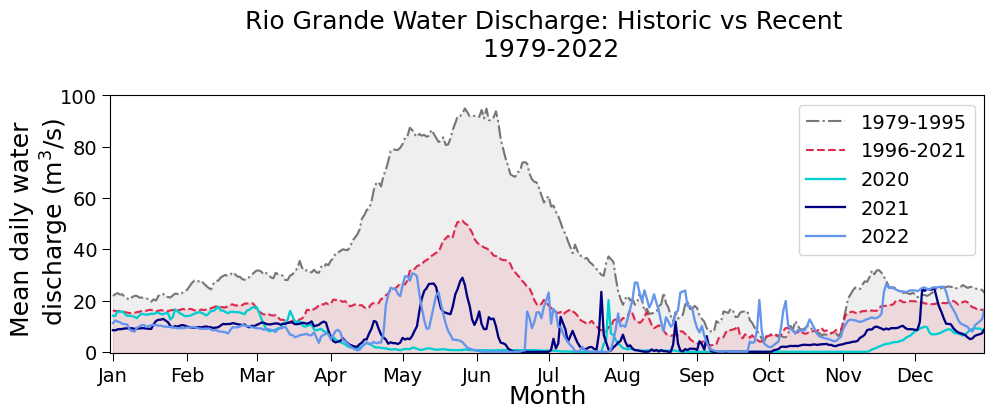

In [8]:
# Make arrays for x-axis labels
days_year = np.arange(1,366,1)
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

# Build the figure
fig = plt.figure(figsize = (10, 4.5))
ax = fig.add_subplot()

# Add data
ax.plot(days_year, sm_wet_reshape_daily, label = '1979-1995', linestyle = '-.', linewidth=1.5, color = 'dimgrey', alpha=0.9)
ax.plot(days_year, sm_dry_reshape_daily, label = '1996-2021', linestyle = '--', linewidth=1.5, color= 'crimson', alpha=0.9)
ax.plot(days_year, sm_20['Mean Qw (m^3/s)'], label = '2020', linewidth=1.65, color = 'darkturquoise')
ax.plot(days_year, sm_21['Mean Qw (m^3/s)'], label = '2021', linewidth=1.65, color = 'navy')
ax.plot(days_year, sm_22['Mean Qw (m^3/s)'], label = '2022', linewidth=1.65, color = 'cornflowerblue')

# Add shading below wet and dry cycle data
ax.fill_between(days_year, sm_wet_reshape_daily, -0.5, color='dimgrey', alpha=0.1)
ax.fill_between(days_year, sm_dry_reshape_daily, -0.5, color='crimson', alpha=0.1)

# Format plot
plt.xlim(0,365), plt.ylim(-0.5,100)

plt.xlabel('Month', size=18), plt.ylabel('Mean daily water \n discharge (m$^3$/s)', size=18)

plt.legend(fontsize=14, loc='upper right')

plt.xticks(fontsize=14), plt.yticks(fontsize=14)

ax.set_xticks(month_starts), ax.set_xticklabels(month_names)

ax.yaxis.set_label_coords(-.045,.5), ax.xaxis.set_label_coords(.5,-.12)

ax.xaxis.set_tick_params(which='major', length=6, width=0.75), ax.yaxis.set_tick_params(which='major', length=6, width=0.75)

plt.title('Rio Grande Water Discharge: Historic vs Recent \n 1979-2022', size = 18, y=1.12)

plt.tight_layout()

# Save figure to folder
fig.savefig('Saved_Figures/Figure2a', dpi=150)

plt.show()